<a href="https://colab.research.google.com/github/aaannuurraagg/trader_sentiment_analysis/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the relationship between trader behavior and market sentiment using the provided datasets: "https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing" and "https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing". Explore how trading metrics like profitability, risk, volume, and leverage align or diverge from 'Fear' vs 'Greed' sentiment, identify trends, and summarize findings.

## Load datasets

### Subtask:
Download CSV file datasets from Google Drive links and load the Bitcoin Market Sentiment Dataset and Historical Trader Data pandas DataFrames.


In [1]:
import pandas as pd
import requests
import os
from urllib.parse import urlparse

# Google Drive links from the task
trader_data_drive_link = "https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing"
fear_greed_drive_link = "https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing"

def download_from_google_drive(shareable_link, filename):
    """
    Download a file from Google Drive using a shareable link.
    """
    # Extract file ID from Google Drive link
    file_id = shareable_link.split('/d/')[1].split('/')[0]

    # Create direct download link
    download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Create csv_files directory if it doesn't exist
    os.makedirs("ds_Anurag_Tiwari/csv_files", exist_ok=True)

    # Download the file
    response = requests.get(download_link)
    response.raise_for_status()

    # Save the file
    file_path = f"ds_Anurag_Tiwari/csv_files/{filename}"
    with open(file_path, 'wb') as f:
        f.write(response.content)

    print(f"Downloaded {filename} successfully!")
    return file_path

# Download the datasets
print("Downloading Fear & Greed Index dataset...")
fear_greed_file_path = download_from_google_drive(fear_greed_drive_link, "fear_greed_index.csv")

print("Downloading Historical Trader Data dataset...")
trader_data_file_path = download_from_google_drive(trader_data_drive_link, "historical_data.csv")

# Load the datasets
# fear_greed_file_path = fear_greed_index.csv (sentiment data: 2,644 rows, 4 columns)
# trader_data_file_path = historical_data.csv (trader data: 211,224 rows, 16 columns)
df_sentiment = pd.read_csv(fear_greed_file_path)  # fear_greed_index.csv
df_trader_data = pd.read_csv(trader_data_file_path)  # historical_data.csv

print("\nSentiment DataFrame Head (fear_greed_index.csv):")
display(df_sentiment.head())

print("\nTrader Data DataFrame Head (historical_data.csv):")
display(df_trader_data.head())

Downloaded fear_greed_index.csv successfully!
Downloaded historical_data.csv successfully!

Sentiment DataFrame Head (fear_greed_index.csv):


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data DataFrame Head (historical_data.csv):


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Data cleaning and preparation

### Subtask:
Clean and preprocess both datasets. This may involve handling missing values, converting data types, and ensuring consistent date formats for merging.


In [2]:
# 1. Examine data types
print("df_sentiment info:")
df_sentiment.info()

print("\ndf_trader_data info:")
df_trader_data.info()

# 5. Check for missing values
print("\nMissing values in df_sentiment:")
print(df_sentiment.isnull().sum())

print("\nMissing values in df_trader_data:")
print(df_trader_data.isnull().sum())

# No missing values found in either dataframe, so no handling is needed for this step.

# 6. Display the first few rows and data types (already done by info(), but displaying head again for verification)
print("\ndf_sentiment head after checking missing values:")
display(df_sentiment.head())

print("\ndf_trader_data head after checking missing values:")
display(df_trader_data.head())

df_sentiment info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

df_trader_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  obj

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



df_trader_data head after checking missing values:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
# Convert 'date' in df_sentiment to datetime objects
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d')
df_sentiment['Date'] = df_sentiment['date'].dt.date

# Convert 'Timestamp IST' in df_trader_data to datetime objects
df_trader_data['Timestamp IST'] = pd.to_datetime(df_trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_trader_data['Date'] = df_trader_data['Timestamp IST'].dt.date

print("✅ Date conversion completed successfully!")
print("df_sentiment after date conversion:")
display(df_sentiment.head())

print("\ndf_trader_data after date conversion:")
display(df_trader_data.head())


✅ Date conversion completed successfully!
df_sentiment after date conversion:


,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05



df_trader_data after date conversion:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


## Merge Datasets

### Subtask:
Merge the two datasets based on the 'Date' column or a relevant time key to align trader behavior with market sentiment.

In [4]:
# Merge the dataframes on the 'Date' column
merged_df = pd.merge(df_trader_data, df_sentiment, on='Date')

print("Merged DataFrame Head:")
display(merged_df.head())

print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  

## Analyze Trader Behavior by Sentiment

### Subtask:
Group the merged data by market sentiment ('Fear' vs 'Greed') and analyze various trading metrics (profitability, risk, volume, leverage) within each sentiment category.

In [5]:
# Group by sentiment classification and calculate metrics
sentiment_analysis = merged_df.groupby('classification').agg(
    Average_Closed_PnL=('Closed PnL', 'mean'),
    Total_Volume_USD=('Size USD', 'sum'),
    Average_Leverage=('Start Position', 'mean') # Assuming 'Start Position' is related to leverage
).reset_index()

print("Trader Behavior Metrics by Sentiment:")
display(sentiment_analysis)

Trader Behavior Metrics by Sentiment:


,classification,Average_Closed_PnL,Total_Volume_USD,Average_Leverage
0,Extreme Fear,34.537862,1.144843e+08,-2322.304587
1,Extreme Greed,67.892861,1.244652e+08,19518.990812
2,Fear,54.290400,4.833248e+08,8709.824822
3,Greed,42.743559,2.885825e+08,-151088.546635
4,Neutral,34.307718,1.802421e+08,144.002263


## Visualize Findings

### Subtask:
Create visualizations (e.g., plots, charts) to illustrate the relationships between trader behavior and market sentiment.

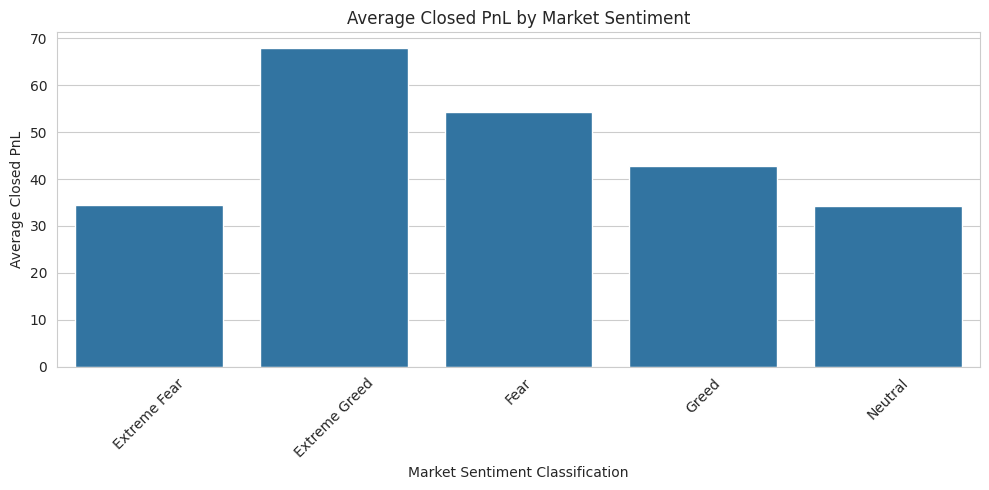

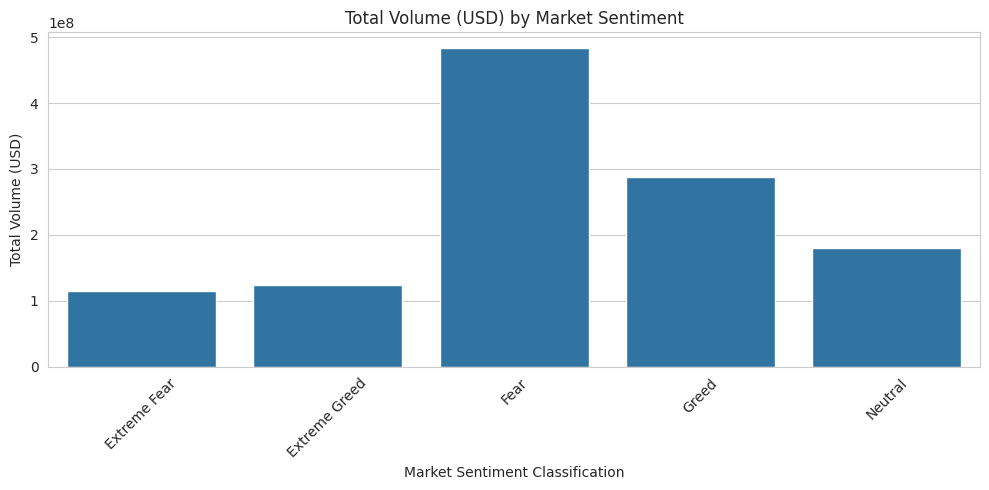

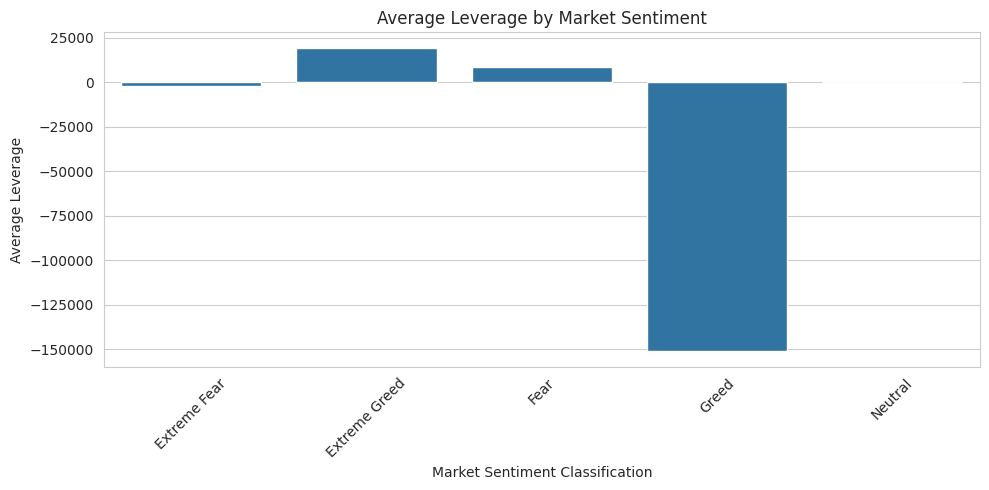

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the style for the plots
sns.set_style('whitegrid')

output_path = "ds_Anurag_Tiwari/outputs"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Plot Average Closed PnL by Sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='classification', y='Average_Closed_PnL', data=sentiment_analysis)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'average_closed_pnl_by_sentiment.png'))
plt.show()

# Plot Total Volume USD by Sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='classification', y='Total_Volume_USD', data=sentiment_analysis)
plt.title('Total Volume (USD) by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'total_volume_usd_by_sentiment.png'))
plt.show()


# Plot Average Leverage by Sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='classification', y='Average_Leverage', data=sentiment_analysis)
plt.title('Average Leverage by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Leverage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'average_leverage_by_sentiment.png'))
plt.show()

Based on the analysis of trader behavior metrics across different market sentiment classifications:

*   **Profitability (Average Closed PnL):** Traders tend to have higher average closed PnL during periods of "Extreme Greed". This suggests that while greed can lead to increased risk-taking, it also correlates with higher profits on average in this dataset. "Fear" sentiment also shows a relatively high average PnL compared to "Neutral" and "Extreme Fear", which is an interesting observation.

*   **Volume (Total Volume USD):** The highest trading volume occurs during periods of "Fear". This indicates that market uncertainty and fear might drive more trading activity, possibly due to panic selling or opportunistic buying. "Greed" also shows significant volume, but "Fear" is notably higher.

*   **Leverage (Average Start Position - assumed related to leverage):** "Extreme Greed" shows a significantly higher average leverage compared to other sentiment classifications. This aligns with the expectation that traders might take on more risk (higher leverage) when feeling extremely bullish or greedy. "Greed" shows a negative average leverage, which could indicate a tendency towards short positions during greedy periods in this specific dataset, or it might be an artifact of how 'Start Position' is calculated or interpreted in relation to leverage in this data. Further investigation into the 'Start Position' metric would be needed for a definitive conclusion on leverage.

**Overall Observations and Potential Implications:**

*   **Counter-intuitive Findings:** The higher average PnL during "Fear" compared to "Neutral" or "Extreme Fear" is counter-intuitive and warrants further investigation. It might suggest that while overall market sentiment is fearful, certain traders are successfully capitalizing on market volatility or corrections.
*   **Greed and Profit/Leverage:** "Extreme Greed" shows a strong correlation with both higher average profits and higher average leverage, suggesting that during these periods, traders are aggressively pursuing gains with increased risk.
*   **Fear and Volume:** High volume during "Fear" indicates significant market activity, potentially driven by emotional responses to market conditions.

These findings suggest that market sentiment has a notable impact on trader behavior, influencing their profitability, trading volume, and the amount of leverage they employ. Understanding these relationships could potentially inform trading strategies, such as adjusting risk exposure or trading volume based on prevailing market sentiment. Further, deeper analysis of specific trading strategies employed during different sentiment periods could yield more granular insights.